In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
from sklearn.datasets import make_blobs

In [13]:
x,y = make_blobs(n_samples=1000, centers = 3, n_features=2, random_state=23)

In [14]:
x.shape

(1000, 2)

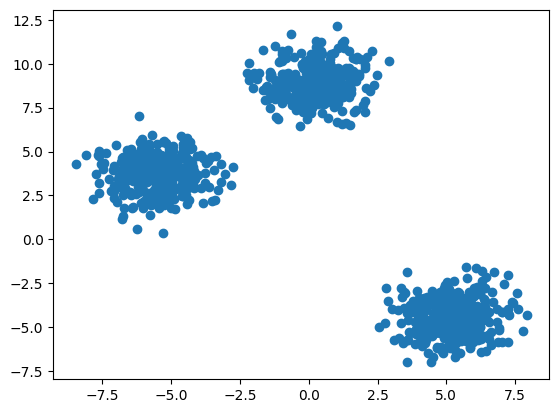

In [15]:
plt.scatter(x[:,0],x[:,1])

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=42)

In [19]:
from sklearn.cluster import KMeans


In [20]:
wcss = []
for k in range(1,15):
    kmeans = KMeans(n_clusters=k, init = 'k-means++')
    kmeans.fit(x_train)
    wcss.append(kmeans.inertia_)


In [21]:
wcss

[34827.57682552023,
 7935.437286145421,
 1319.2730531585605,
 1140.5080335274672,
 992.6326991429296,
 919.2058146768742,
 769.5796518768348,
 666.4614204713512,
 653.0819638330685,
 542.54225494975,
 498.0614435959959,
 454.9307163549643,
 427.7036855451704,
 409.76156896285033]

([<matplotlib.axis.XTick at 0x11cda7250>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11')])

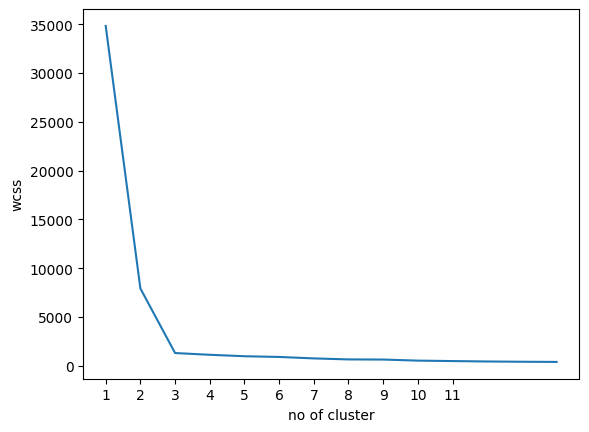

In [22]:
plt.plot(range(1,15),wcss)
plt.xlabel("no of cluster")
plt.ylabel("wcss")
plt.xticks(range(1,12))

In [23]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
y_pred_train = kmeans.fit_predict(x_train)

In [24]:
y_pred_test = kmeans.predict(x_test)

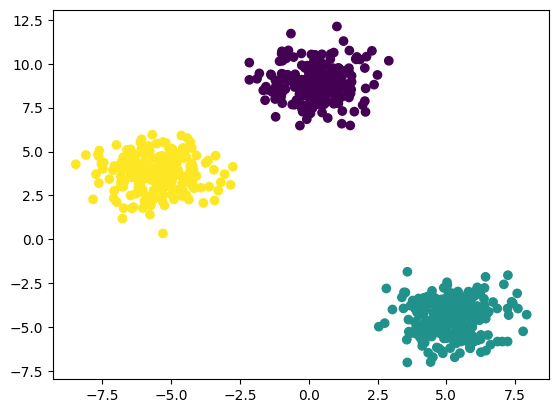

In [25]:
plt.scatter(x_train[:,0], x_train[:,1], c= y_pred_train)

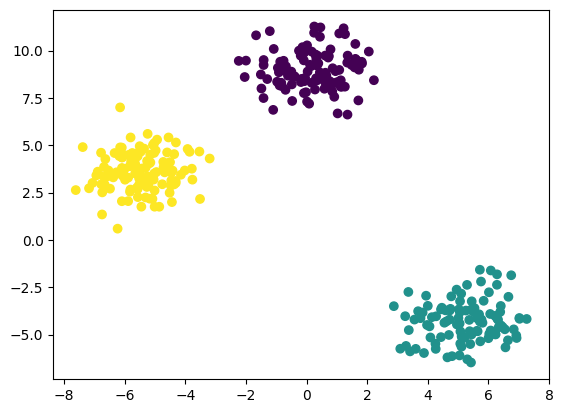

In [26]:
plt.scatter(x_test[:,0], x_test[:,1], c= y_pred_test)


## Silhouette score

In [29]:
from sklearn.metrics import silhouette_score

In [30]:
silhouette_coff = []
for k in range(2,11):
    kmeans = KMeans(n_clusters= k , init = 'k-means++')
    kmeans.fit(x_train)
    score = silhouette_score(x_train, kmeans.labels_)
    silhouette_coff.append(score)

In [31]:
silhouette_coff

[0.7281443868598331,
 0.8071181203797673,
 0.6357733426488265,
 0.5098512808038074,
 0.32396710063818446,
 0.3298573634888502,
 0.34241567609837065,
 0.3274982509359359,
 0.33950648839831504]

([<matplotlib.axis.XTick at 0x11d0d3d90>,
 [Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

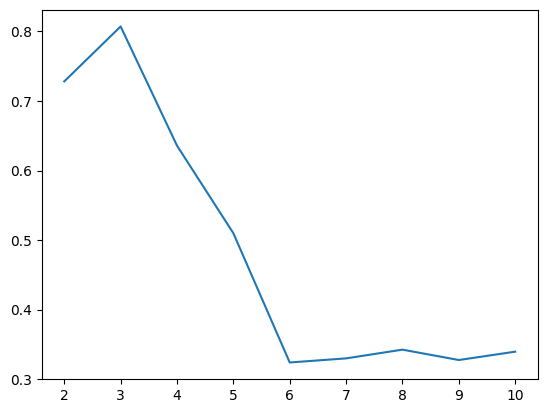

In [32]:
plt.plot(range(2,11), silhouette_coff)
plt.xticks(range(2,11))

## DBScan

In [33]:
from sklearn.datasets import make_moons

In [34]:
x,y = make_moons(n_samples=250 , noise=0.05)

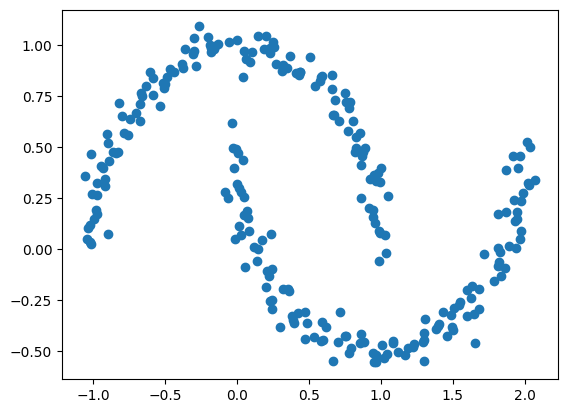

In [35]:
plt.scatter(x[:,0], x[:,1])

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [37]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 0.5)

In [38]:
dbscan.fit(x_scaled)

,eps,0.5
,min_samples,5
,metric,'euclidean'
,metric_params,None
,algorithm,'auto'
,leaf_size,30
,p,None
,n_jobs,None


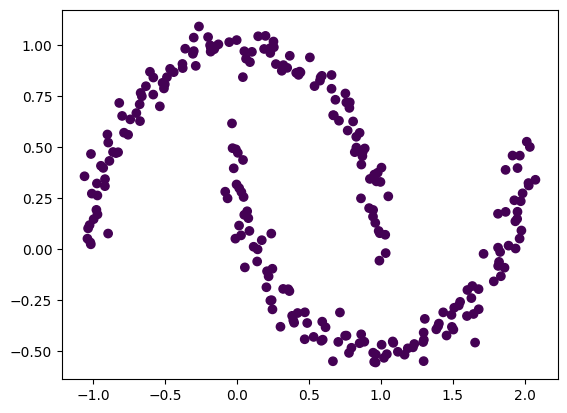

In [39]:
plt.scatter(x[:,0], x[:,1], c = dbscan.labels_)

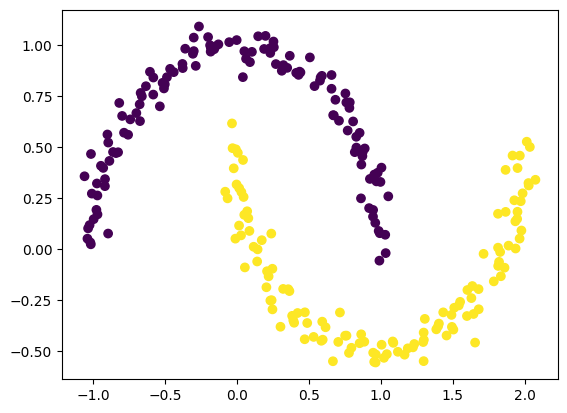

In [40]:
plt.scatter(x[:,0], x[:,1], c = y)